# Cross Validation
### `! git clone https://github.com/ds4e/cv`

## Downsides of Linear Models
- We've previously looked at the horns of a dilemma of linear model-fitting:
  - Omitted Variables Bias: Leave out relevant variables, and the others will receive more weight in the regression to compensate, biasing the coefficient estimates and predictions
  - Multi-Colinearity: Put in too many correlated variables, and the model will deliver highly variable predictions
- This is a specific version of the *bias-variance trade-off*: Expected prediction error is the sum of the bias squared plus the predictor variance plus irreducible error
- This is very frustrating: You want a rich, interesting model, but striking a balance through trial-and-error is not science and often leads to selection bias and over-fitting
- **What is a modern, data driven way to make hyperparameter choices, in a reproducible and responsible way?**

## The Bias-Variance Tradeoff
- The basics of the bias-variance tradeoff is:
\begin{alignat*}{2}
\underbrace{\mathbb{E}_{D,\varepsilon}[(y-\hat{f}(x,D))^2]}_{\text{Expected prediction error}} &=& 
\underbrace{(f(x)-\mathbb{E}_{D}[\hat{f}(x,D)])^2}_{\text{Bias squared}}\\
&+& \underbrace{\mathbb{E}_{D}[(\hat{f}(x,D)-\mathbb{E}_D[\hat{f}(x,D)])^2]}_{\text{Predictor Variance}}\\
&+&  \underbrace{\sigma^2}_{\text{Irreducible Error}}
\end{alignat*}
- Unbiased prediction is nice, but not sufficient or necessary for good prediction: Predictor variance also plays an important role

# Example: Polynomial Approximation

## A Concrete Example
- Let's start with a specific problem: We want to model a noisy function $ f(x) + \varepsilon$ with powers of x, as $b_0 + b_1 x + b_2 x^2 + ... + b_K x^K$
- Consider
$$
y_i = \underbrace{\sin(x_i)x_i}_{f(x_i)} + \varepsilon_i
$$
- Why this function? It makes an aesthetically pleasing, obviously non-linear shape. Please do not get hung up on the $\sin(x)x$. 
- It cannot be precisely fit with a linear model, even if we removed the noise $\varepsilon_i$, but in principle we can approximate it as closely as we want by using powers of $x_i$, like $x_i, x_i^2, x_i^3, ...$.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

np.random.seed(112)

N = 1250
se_eps = 2
mean_x = 7
se_x = 2

# Create x:
x = np.random.default_rng().normal(mean_x, se_x, N).T # Generate x's
eps = np.random.default_rng().normal(0, se_eps, N).T # Generate shocks

# Create y:
y_actual = np.sin(x)*x
y = y_actual + eps

# Store in dataframe:
df = pd.DataFrame({'y':y,'x':x,'intercept':np.ones(N),'y_actual':y_actual})
df.head()


,y,x,intercept,y_actual
0,7.424016,7.808047,1.0,7.799810
1,-9.191775,10.051587,1.0,-5.895889
2,8.632719,8.377275,1.0,7.256212
3,-1.588795,3.051068,1.0,0.275819
4,-2.209495,3.130092,1.0,0.035996


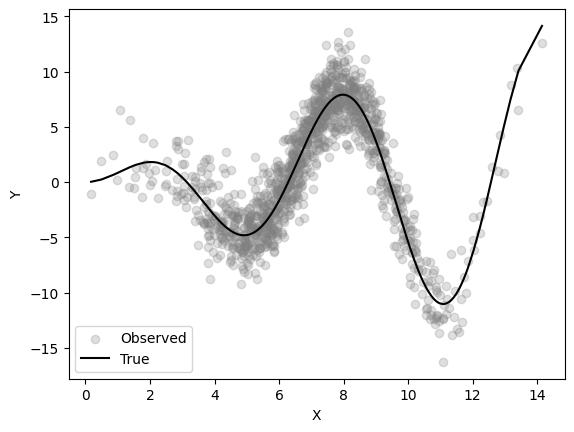

In [12]:
gdf = df.sort_values('x')
plt.scatter(gdf['x'],gdf['y'], label='Observed',color='grey', alpha = .25)
plt.plot(gdf['x'],gdf['y_actual'], label ='True',color='black')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(loc='lower left')
plt.show()

In [13]:
## Train test split:
df_train = df.iloc[:1000,:]
df_test = df.iloc[1000:,:]

df_train = df_train.sort_values('x')
df_test = df_test.sort_values('x')

X_train = df_train.loc[:,['x','intercept'] ] 
y_train = df_train.loc[:,['y'] ]
X_test = df_test.loc[:,['x','intercept'] ] 
y_test = df_test.loc[:,['y'] ]
y_true = df_test.loc[:,['y_actual']]


Degree:  1 , Rsq, train:  0.026315520608336862 , RMSE, train:  5.381741257909377
Degree:  1 , Rsq, test:  0.022359458827203582 , RMSE, test:  5.24952422355946


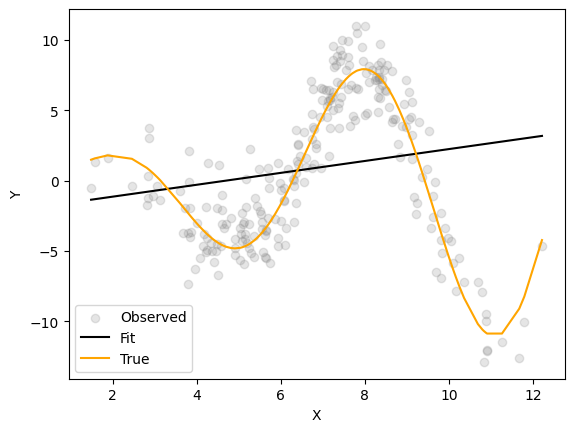



Degree:  3 , Rsq, train:  0.23201637508648487 , RMSE, train:  4.779579286609855
Degree:  3 , Rsq, test:  0.3794590683949529 , RMSE, test:  4.182303634972896


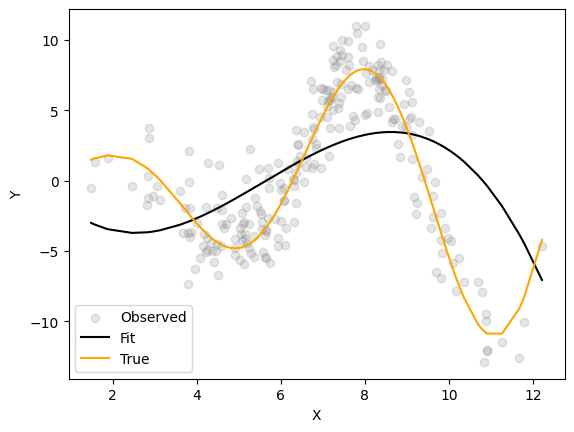



Degree:  5 , Rsq, train:  0.7151360350962526 , RMSE, train:  2.9109345964189166
Degree:  5 , Rsq, test:  0.7756980063950322 , RMSE, test:  2.5144726116001013


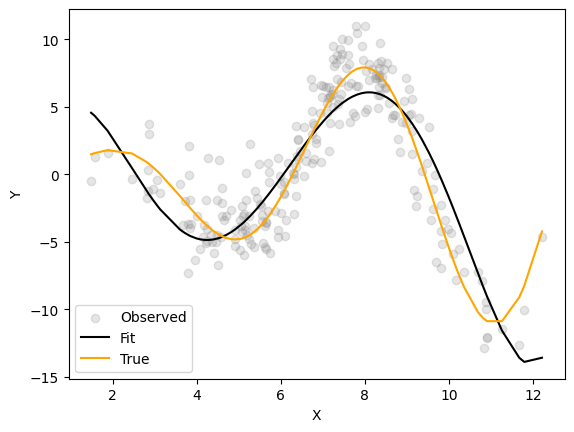



Degree:  7 , Rsq, train:  0.8614305440129769 , RMSE, train:  2.0302403098368758
Degree:  7 , Rsq, test:  0.850727572424389 , RMSE, test:  2.0512573043275424


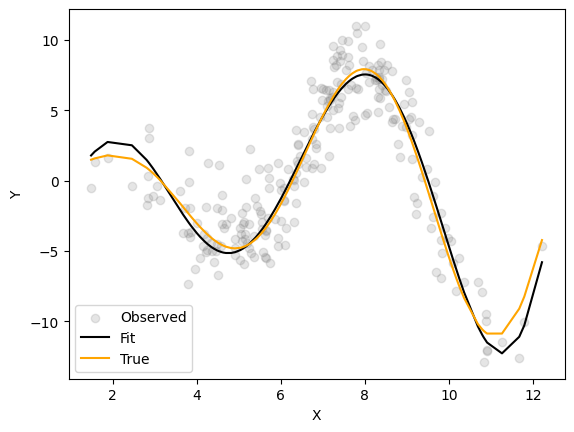



Degree:  9 , Rsq, train:  0.8719706474293469 , RMSE, train:  1.9514995927911694
Degree:  9 , Rsq, test:  0.8554713427939283 , RMSE, test:  2.018400413904192


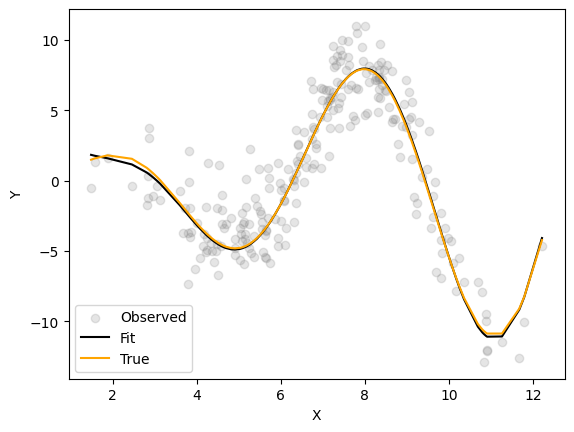



Degree:  11 , Rsq, train:  0.8721141921618291 , RMSE, train:  1.9504052888516028
Degree:  11 , Rsq, test:  0.8549315804428129 , RMSE, test:  2.022165899888796


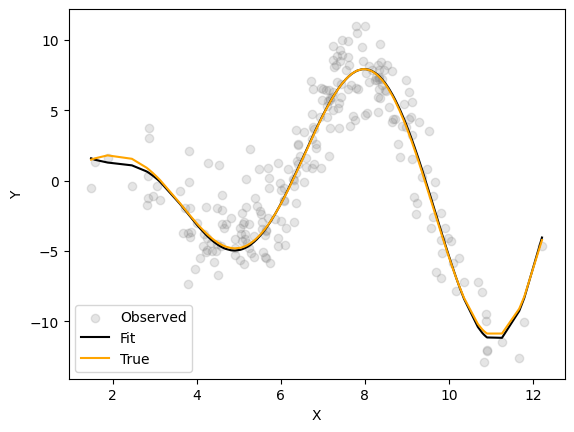



Degree:  13 , Rsq, train:  0.8721405542576874 , RMSE, train:  1.9502042523876493
Degree:  13 , Rsq, test:  0.8545618419776793 , RMSE, test:  2.024741225114394


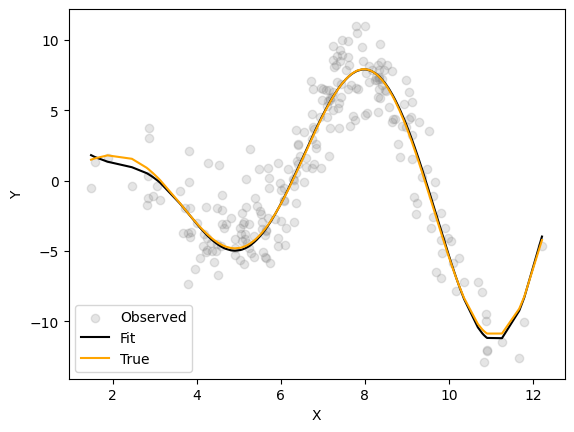



Degree:  15 , Rsq, train:  0.8711189521458682 , RMSE, train:  1.9579798566320685
Degree:  15 , Rsq, test:  0.853939695734596 , RMSE, test:  2.0290672592400805


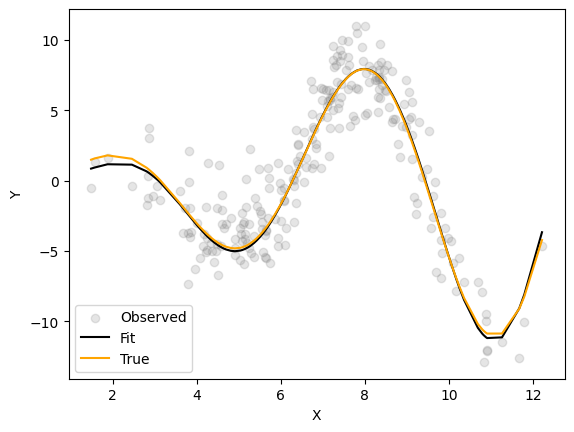



Degree:  17 , Rsq, train:  0.8689368926272031 , RMSE, train:  1.974485371718279
Degree:  17 , Rsq, test:  0.8564605464607509 , RMSE, test:  2.0114812421630814


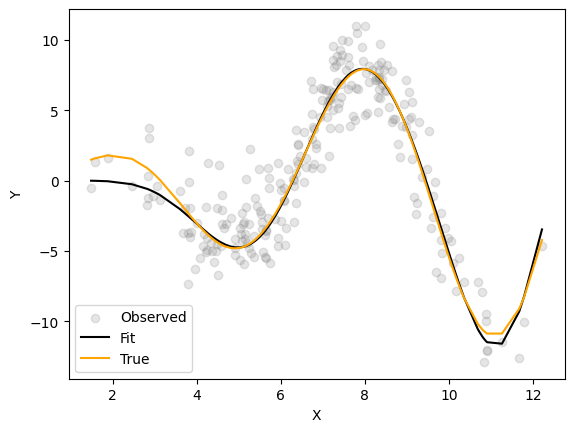



Degree:  19 , Rsq, train:  0.8507339757491925 , RMSE, train:  2.1071437922638014
Degree:  19 , Rsq, test:  0.845225898478573 , RMSE, test:  2.0887164566532492


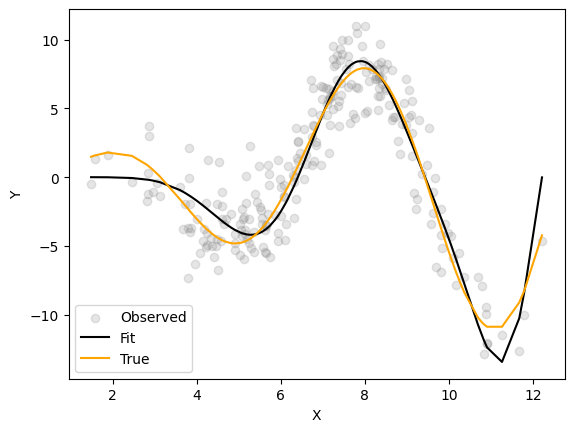



Degree:  21 , Rsq, train:  0.6767800653117391 , RMSE, train:  3.100721491505648
Degree:  21 , Rsq, test:  0.7351501591293401 , RMSE, test:  2.732311442406352


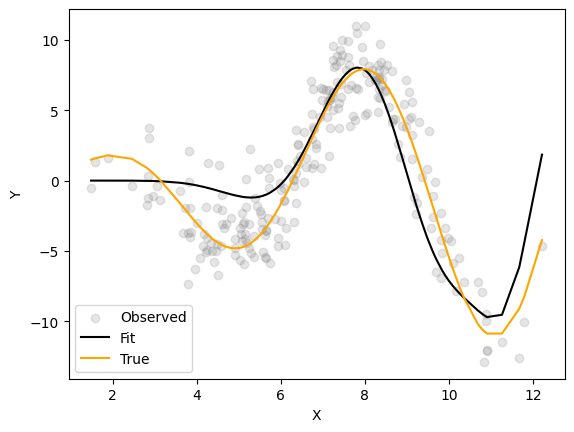



Degree:  23 , Rsq, train:  0.5792231581858969 , RMSE, train:  3.5378515452406742
Degree:  23 , Rsq, test:  0.6078674636665038 , RMSE, test:  3.324656506154982


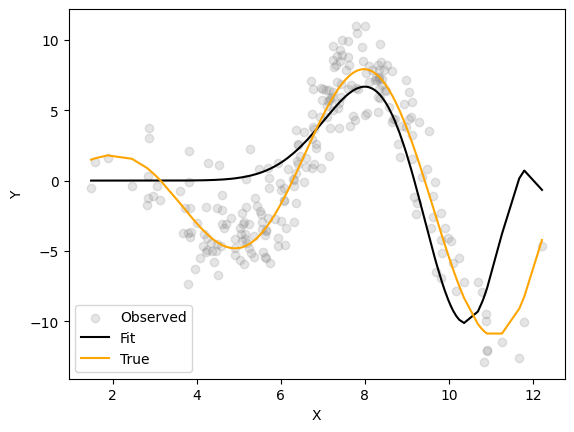



Degree:  25 , Rsq, train:  0.6042581959976259 , RMSE, train:  3.43099160111965
Degree:  25 , Rsq, test:  0.7022913502478085 , RMSE, test:  2.8968504092353426


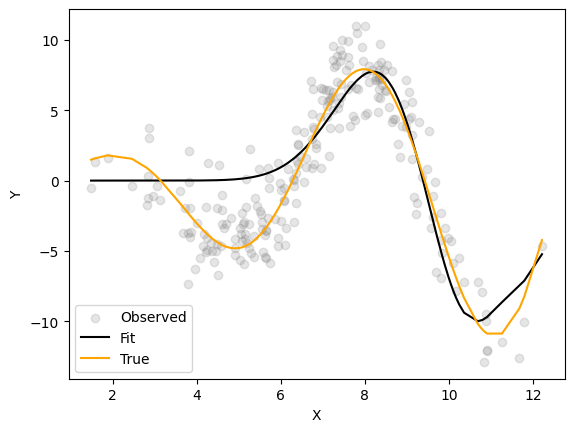

In [14]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression # Import linear regression model

rsq = []
rmse = []
for d in np.arange(1,27,2):
    expander = PolynomialFeatures(degree=d,include_bias=False)
    #
    # Expand variables:
    Z_train = expander.fit_transform(X_train)
    Z_test = expander.fit_transform(X_test)
    names = expander.get_feature_names_out() # Get the names of these variables
    #
    # Regression:
    reg = LinearRegression(fit_intercept=False).fit(Z_train,y_train) # Run regression
    y_hat_test = reg.predict(Z_test)
    y_hat_train = reg.predict(Z_train)
    rmse_test = np.sqrt( np.mean( (y_test - y_hat_test)**2 ))
    rmse_train = np.sqrt( np.mean( (y_train - y_hat_train)**2 ))
    print('Degree: ', d, ', Rsq, train: ', reg.score(Z_train,y_train), ', RMSE, train: ', rmse_train) # R2
    print('Degree: ', d, ', Rsq, test: ', reg.score(Z_test,y_test), ', RMSE, test: ', rmse_test) # R2
    rsq.append(reg.score(Z_test,y_test))
    rmse.append(rmse_test)
    #
    # Plot:
    plt.scatter(X_test['x'],y_test, label='Observed',color='grey',alpha=.2)
    plt.plot(X_test['x'],y_hat_test, label ='Fit',color='black')
    plt.plot(X_test['x'],y_true, label ='True',color='orange')  
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend(loc='lower left')
    plt.show()
    print('\n')


## Nailed it: (?)

Rsq:  1.0 , RMSE:  0.0


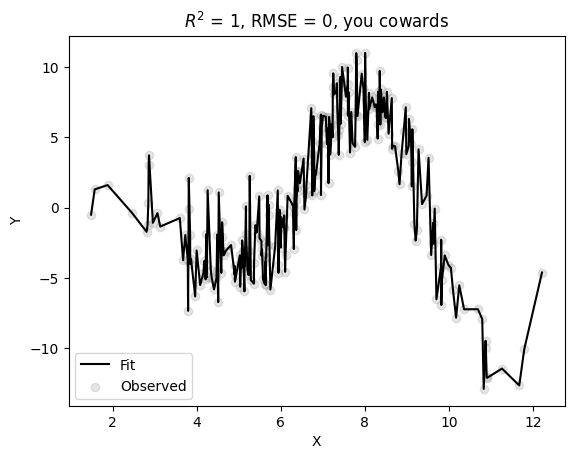

In [15]:
dummies = pd.get_dummies(X_test['x'],dtype=int)

# Regression:
reg = LinearRegression(fit_intercept=False).fit(dummies,y_test) # Run regression
y_hat = reg.predict(dummies)
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('Rsq: ', reg.score(dummies,y_test), ', RMSE: ', rmse) # R2

# Plot:
plt.plot(X_test['x'],y_hat, label ='Fit',color='black')
plt.scatter(X_test['x'],y_test, label='Observed',color='grey',alpha = .2)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("$R^2$ = 1, RMSE = 0, you cowards")
plt.legend(loc='lower left')
plt.show()

## Data Driven Model Selection
- Of course, if we did the train-test split, we'd see a bias-variance/overfitting-underfitting trade-off emerge
    - Too simple (too few powers of $x$), and you underfit, and the model does a poor job predicting
    - Too complex (too many powers of $x$), and you overfit, and the model does a poor job predicting
    - There is a computational breakdown here as well as a statistical one: Solving for the OLS estimator becomes a numerically unstable calculation ($X$ is a **Vandermonde Matrix** and $X'X$ is **ill-conditioned**)
- But if you only make one split and test many models, you are going to start "overfitting on the test set", using that particular split's peculiar features that fail to generalize
- How do you responsibly test many models without creating an overfit, non-reproducible mess?

# Cross Validation

## Cross Validation
- We want to generalize the concept of the single training/test split that we've used repeatedly to discpline our model building
- The danger is that with one train/test split, you end up overfitting also on the test set by repeatedly adjusting the model and refitting on the training set
- To control this kind of error, we split the data into more than two chunks and use the chunks in thoughtful ways to discipline our model-building decisions
- You can think of this as a way of generalizing train/test splitting

## Model Type
- A **model type** is a member of a model space, often parameterized by a hyperparameter $H$:
    - Second degree polynomials
    - The first five variables of the dataframe
    - The first three principal components
    - A max depth of 10 or min samples leaf of 30


## Model Space
- A **model space** is a set of model types, often parameterized by some hyperparameter $H$. For example,
    - The model space is $b_0 + b_1 x + b_2 x + ... + b_H x^H$: Polynomials parameterized by $H$
    - The model space is all $2^H$ subsets of the variables available
    - The model space is how many principle components to include, $H \le L$
    - The model space is the max depth or min samples leaf of a tree or random forest

- A model space is a set of high-level choices about the structure of the model and hyper-parameters

- Once we pick a model type to use, we still have to train the parameters for a model: The coefficients, the splits, etc., which requires the training data

## $k$-Fold Cross Validation
- Imagine you have a model space with some hyperparameter $H$

    0. (Break the data into an 80/20 train/test split)
    1. Break the training data into $K$ equally sized chunks, usually between 5 and 10
    2. Fit each model $K-1$ times, then compute its performance on the $K$-th chunk
    3. Average the $K$ performance measurements to get an expected performance measurement for the model (median actually seems to work best)
    4. Repeat steps 1-3 for all of the model types in the model space under consideration, and then pick the best model type (in terms of $R^2$, RMSE, accuracy, etc.)
    5. (Using the optimal model type, fit your model on all the training data, and evaluate its performance on the test data)

- Note that since you are trying to pick a hyperparameter/complexity, we're trying to understand how the "expected fitted model" will perform; it is more like bootstrapping than it might initially appear (and "bootstrap validation" is an alternative to CV)

## $k$-Fold Cross Validation

![](crossvalidation.png)


## Example: Cross Validation
- We have $N=1000$ in our training set, so taking $k=10$ means $1000/10 =100$ data points per fold
- Here's how this works:
    1. For each polynomial degree
    2. Fit a model of that degree on each of the $k-1$ folds and compute its $R^2$ or RMSE on the $k$-th test fold, cycling through $k$
    3. Take the median (or mean) of the $K$ performance values on the test folds to get an overall metric for this polynomial degree
    4. Repeat steps 1-3 for each of the degrees being considered

In [16]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error

k = 100
deg_max = 30
RMSE = np.zeros(deg_max)
R2 = np.zeros(deg_max)

# Cross validation:
for i in range(deg_max):
    
    # Expand variables:
    expander = PolynomialFeatures(degree=i+1)
    Z_train = expander.fit_transform(X_train)
    
    # Cross validation:
    reg = LinearRegression()
    scores = cross_validate(reg, Z_train, y_train,  # Model, data
                            cv = k, # How many folds
                            scoring=['r2','neg_root_mean_squared_error']) # Metrics to save
    
    # Get median scores from CV:
    RMSE[i] = np.median(scores['test_neg_root_mean_squared_error'])
    R2[i] = np.median(scores['test_r2'])


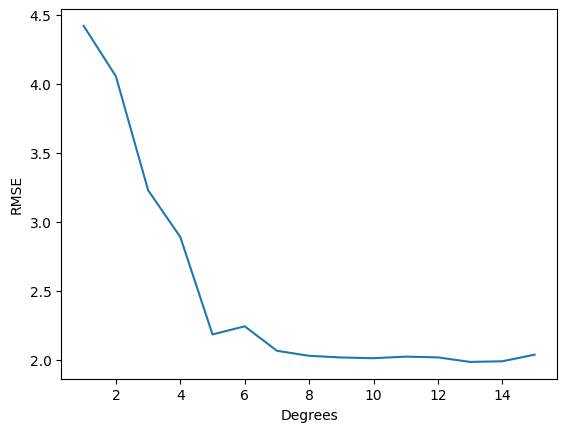

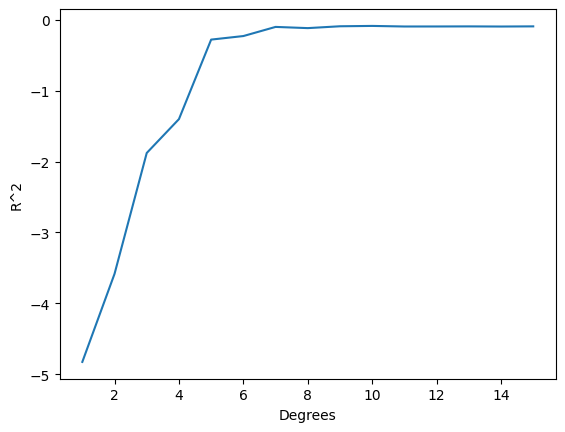

In [7]:
# RMSE
plt.plot(np.arange(1,deg_max+1),-RMSE)
plt.xlabel("Degrees")
plt.ylabel("RMSE")
plt.show()
print('\n')

# R2
plt.plot(np.arange(1,deg_max+1),R2)
plt.xlabel("Degrees")
plt.ylabel("R^2")
plt.show()

## Evaluating the Results
- The `cross_validate` function returns $K$ different values for each fold: You need to combine them into some kind of analysis
- Having suffered a bit... I recommend taking the median of the scores. Sometimes a fold will have extreme values, and it can blow the analysis up.
- The more data you have the more folds you can fit and the better your analysis will be, but that becomes computationally expensive

## Cross Validation with SciKit
- You are passing a model and data and the number $K$ of scores you want, and `cross_validate` returns $K$ scores for that model (it is implementing the logic of the $K$-fold split and evaluation, not searching over the parameter space for you [that's `GridSearchCV`])
- As usual, reproducing Sci-Kit's results is not hard, but doing so helps clarify what exactly Sci-Kit is doing and how it's implementing things

In [8]:
# CV Parameters:
K = 100 # Number of folds
deg_max = 15 # Maximum polynomial degree


# Set up CV objects:
df_train = df_train.sample(frac=1).reset_index(drop=True) # Shuffle the dataframe
N = df_train.shape[0] # Number of rows of data
index = np.linspace(0,N-1,N) # Index all the rows
folds = np.reshape(index,( int(N/K),K)) # Create K folds of N/K values each
print("Folds: \n:", folds)
score_rmse = np.reshape(np.zeros(deg_max*(K)),(deg_max,K)) # Save computed RMSE
score_rsq = np.reshape(np.zeros(deg_max*(K)),(deg_max,K)) # Save computed Rsq

# def expand_columns(vec, J):
#     """ Expand vector into Vandermonde/power matrix"""
#     M = np.zeros((len(vec),J))
#     for j in range(J):
#         M[:,j] = vec**j
#     return(M)

def expand_columns(vec, J):
    """ Expand vector into Vandermonde/power matrix"""
    M = np.zeros((len(vec),J))
    M[:,0] = vec
    for j in np.arange(1,J,1):
        M[:,j] = M[:,(j-1)]*vec
    return(M)

# Cross validation:
for i in range(deg_max):
    # K regressions, each on K-1 folds:
    for k in range(K):
        # Get the appropriate data for this fold 
        df_k_train = df_train.drop( folds[:,k],axis=0) # Train on K-1 folds
        df_k_test = df_train.iloc[ folds[:,k], : ] # Test on kth fold
        
        # Run regression on -kth folds
        Z_train = expand_columns(df_k_train['x'],i+1)
        y_train = df_k_train['y']
        reg_k = LinearRegression(fit_intercept=False).fit(Z_train, y_train) # Fit the linear model
        
        # Predict values on kth fold and compute error
        Z_test = expand_columns(df_k_test['x'],i+1)
        y_test = df_k_test['y']
        y_hat = reg_k.predict(Z_test)
        sse_k = np.sum( (y_test - y_hat)**2 )
        
        # Save CV scores:
        score_rmse[i,k] = np.sqrt( (1/len(y_test))*sse_k )
        score_rsq[i,k] = 1 - sse_k/np.sum( (y_test - np.mean(y_train) )**2 )
        
mean_score_rmse = np.median(score_rmse,axis=1)
mean_score_rsq = np.median(score_rsq,axis=1)


Folds: 
: [[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
   14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
   28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
   42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
   56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
   70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
   84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
   98.  99.]
 [100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112. 113.
  114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125. 126. 127.
  128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139. 140. 141.
  142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153. 154. 155.
  156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167. 168. 169.
  170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181. 182. 183.
  184. 185. 186. 187. 188. 189. 190. 191.

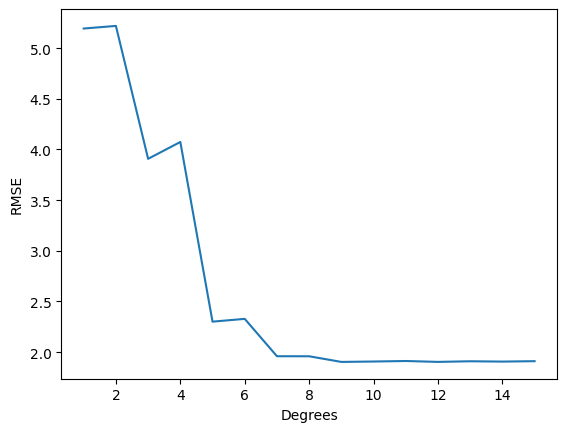

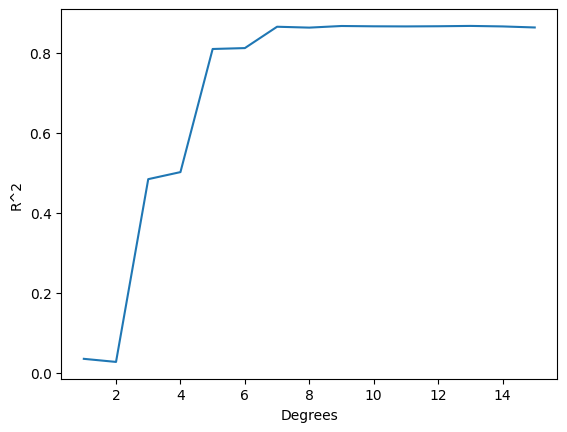

In [9]:
# Plot RMSE
plt.plot(np.arange(1,deg_max+1),mean_score_rmse)
plt.xlabel("Degrees")
plt.ylabel("RMSE")
plt.show()
print('\n')

# Plot R2
plt.plot(np.arange(1,deg_max+1),mean_score_rsq)
plt.xlabel("Degrees")
plt.ylabel("R^2")
plt.show()

## Leave One Out Cross Validation (LOOCV)
- This is a great test of your understanding
- If you have $N$ observations and $K$ folds, you're training the models on 
$$
\dfrac{K-1}{K}N
$$
data points, and testing on $N/K$ data points
- If $K=N$, then you train the models on 
$$
\dfrac{N-1}{N}N = N-1$$
data points, and -- for each model you build -- predict the outcome for the single omitted case.
- This is called **Leave One Out Cross Validation** (LOOCV)
- This is the extreme of $k$-fold CV, and is typically only feasible for particular model spaces where you can solve or update the solution easily, and don't have to retrain the model from scratch
- It helps to think of it as: You are holding out a single observation for the trained model to test itself on, and then averaging across $N$ models that all got to make a one-shot prediction

# Bootstrap Validation

## Validation Strategies
- The core concept of most model selection methods is to **to evaluate the model on data the model has not seen** 
- You might have had an idea: Why not bootstrap replicate training samples and fit the model on them, record the $R^2$/RMSE/accuracy, and look at the sampling distribution of outcomes?
- This won't be an accurate estimate of actual performance: You can get a sampling distribution of $R^2$ values **on the training set** this way, but they will be misleading about out-of-sample performance
- Instead, there is a clever way to go even further than $K$-fold CV ?

## Out-of-Bag Values
- When you draw your data with replacement, some observations do not make it into your bootstrap replication dataset, because some observations are drawn more than once
- Those observations that fail to make it into the replication are called "Out of Bag" (bootstrap aggregation = bagging, out-of-bag... get it?)
- To evaluate the performance of the model, we train it on the replication data, then compute its performance on the out-of-bag values
- This gives something in-between $K$-fold CV and LOOCV
- Unfortunately, it is much more computationally intensive than CV, since you train the model for each bootstrap replication 

# Conclusion

## Model Selection Tools
- You have all these tools, which have hyper-parameters:
    - $k$-NN regression/classification: The number of neighbors
    - $k$-MC clustering: The number of clusters
    - Linear/Logistic Regression: The variables to include 
    - Trees/Random Forests: The max depth or min impurity decrease or the min samples leaf
    - Multilayer perceptron: The depth of the network and the width of the layers
    - PCA: The number of components to use
- You now have a great tool for replacing the train/test split with something more reproducible and data-driven: cross validation

## The Last Puzzle Piece
- With a strategy for comparing models within a class, we've resolved one of the biggest tensions in machine learning: How do you pick hyper-parameters responsibly?
- In some cases, train-test split is all that's feasible: If we have a model with millions of billions of parameters, training it even once is extremely costly, so doing it many times is not going to work
- If the data and model are more moderately sized, $K$-fold CV and bootstrap CV become much more feasible, and can provide guidance to hyperparameter choice in high stakes situations
- Next time, we'll look at our last tool: Regularization, where we use $k$-fold CV to decide how to choose variables for a model in a clever way